# Multi-Label Text Classification
###### Rosario Scuderi

![Titolo](https://wallpapercave.com/wp/wp5342493.jpg)

<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:light-blue; border:0; color:white' role="tab" aria-controls="home"><center>Introduzione</center></h2>

    

L'obbiettivo di questo notebook è mostrare l'implementazione di un **classificatore multi-label** che sia in grado di associare uno o più generi ad una determinata serie anime, utilizzando le rispettive **sinossi**.

In primis, si eseguirà un processo di **Data Cleaning** per testare la qualità dei dati e, qualora fosse necessario, modificarli in modo da evitare errori e renderli migliori.

In un secondo momento, dopo aver effettuato una breve **analisi**, si testeranno diversi classificatori e tra questi verrà effettuato un **confronto**.

In generale si effettueranno i seguenti passaggi:
   
* [**Presentazione del dataset**](#1)
* [**Data Cleaning e riorganizzazione del dataset**](#2)
* [**Text Processing (NLP)**](#3)
* [**Analisi**](#4)
* [**Implementazione e confronto  dei classificatori**](#5)
* [**Conclusione e considerazioni finali**](#6)

<a id="1"></a>
<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:light-blue; border:0; color:white' role="tab" aria-controls="home"><center>1. Presentazione del dataset</center></h2>
    


I dati provengono dal databases del sito **[My animelist](https://myanimelist.net/)** e includono informazioni sulle varie serie (generi e sinossi); Inoltre, sono stati estratti tramite processi di scraping dal sito stesso.

![logo](https://upload.wikimedia.org/wikipedia/commons/7/7a/MyAnimeList_Logo.png)

Per informazioni aggiuntive: **[Info](https://www.kaggle.com/datasets/hernan4444/anime-recommendation-database-2020)**

#### 1.1 - Importazione del dataset

In [1]:
import pandas as pd
import csv
df = pd.read_csv ('anime_with_synopsis.csv')
df

MAL_ID                             Name    Score  \
0           1                     Cowboy Bebop     8.78   
1           5  Cowboy Bebop: Tengoku no Tobira     8.39   
2           6                           Trigun     8.24   
3           7               Witch Hunter Robin     7.27   
4           8                   Bouken Ou Beet     6.98   
...       ...                              ...      ...   
16209   48481  Daomu Biji Zhi Qinling Shen Shu  Unknown   
16210   48483                     Mieruko-chan  Unknown   
16211   48488  Higurashi no Naku Koro ni Sotsu  Unknown   
16212   48491      Yama no Susume: Next Summit  Unknown   
16213   48492                    Scarlet Nexus  Unknown   

                                                  Genres  \
0        Action, Adventure, Comedy, Drama, Sci-Fi, Space   
1                  Action, Drama, Mystery, Sci-Fi, Space   
2      Action, Sci-Fi, Adventure, Comedy, Drama, Shounen   
3      Action, Mystery, Police, Supernatural, Drama, ...   
4              Adventure, Fantasy, Shounen, Supernatural   
...                                                  ...   
16209                   Adventure, Mystery, Supernatural   
16210                       Comedy, Horror, Supernatural   
16211  Mystery, Dementia, Horror, Psychological, Supe...   
16212                   Adventure, Slice of Life, Comedy   
16213                                    Action, Fantasy   

                                               sypnopsis  
0      In the year 2071, humanity has colonized sever...  
1      other day, another bounty—such is the life of ...  
2      Vash the Stampede is the man with a $$60,000,0...  
3      ches are individuals with special powers like ...  
4      It is the dark century and the people are suff...  
...                                                  ...  
16209  No synopsis information has been added to this...  
16210  ko is a typical high school student whose life...  
16211          Sequel to Higurashi no Naku Koro ni Gou .  
16212                          New Yama no Susume anime.  
16213  Solar calendar year 2020: grotesque organisms ...  

[16214 rows x 5 columns]

Il dataset contiene **16214** records con i **5 attributi** (MAL_ID, Name, Score, Genres, sypnopsis). Molti di questi però non contengono abbastanza informazioni e quindi è necessario effettuare un processo di data cleaning.

<a id="2"></a>
<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:orange; border:0; color:white' role="tab" aria-controls="home"><center>2. Data Cleaning e riorganizzazione del dataset</center></h2>
    


![dc](https://i.ytimg.com/vi/QStMjyxVkqw/maxresdefault.jpg)

Per limitare il numero di possibili errori e aumentare le prestazioni dei vari classificatori è utile effettuare un processo di **Data Cleaning** sul dataset.

In [2]:
df=df.drop(['Score'], axis = 1)

#### 2.1 - Ricerca ed eliminazione dei duplicati

In [3]:
df[df.duplicated(['Name'])]

MAL_ID                                               Name  \
12347   36296                                        Hinamatsuri   
14117   39143                               Youkoso! Ecolo Shima   
16196   48417  Maou Gakuin no Futekigousha: Shijou Saikyou no...   
16197   48418  Maou Gakuin no Futekigousha: Shijou Saikyou no...   

                                                  Genres  \
12347  Comedy, Sci-Fi, Seinen, Slice of Life, Superna...   
14117                                               Kids   
16196                             Magic, Fantasy, School   
16197             Action, Demons, Magic, Fantasy, School   

                                               sypnopsis  
12347  hile reveling in the successful clinching of a...  
14117  vironmental education film aimed at children. ...  
16196  Second season of Maou Gakuin no Futekigousha: ...  
16197  Second half of Maou Gakuin no Futekigousha: Sh...

All'interno del dataset sono presenti **4 duplciati**.

In [4]:
df=df.drop_duplicates(['Name'])
df.count()

MAL_ID       16210
Name         16210
Genres       16210
sypnopsis    16202
dtype: int64

Dopo l'eliminazione dei duplicati il dataset conta complessivamente **16210** anime ma **8** di questi non hanno un riassunto.

#### 2.2 - Eliminazione degli NA e dei riassunti non validi tra le sinossi

In [5]:
df=df.dropna(subset=["sypnopsis"])
df.count()

MAL_ID       16202
Name         16202
Genres       16202
sypnopsis    16202
dtype: int64

Osservando ed analizzando i dati in maniera più scrupolosa, è possibile notare che, nonostante siano già stati eliminati i valori NA dalla colonna dei riassunti, alcuni di questi non hanno effettivamente un riassunto ma contengono la seguente frase: 

**"No synopsis information has been added to this title. Help improve our database by adding a synopsis here ."**

*Esempio*

In [6]:
df[df['Name']=='Noobow: Na Kokoro']

MAL_ID               Name               Genres  \
6992   18577  Noobow: Na Kokoro  Kids, Slice of Life   

                                              sypnopsis  
6992  No synopsis information has been added to this...

*Eliminazione*

In [7]:
df = df.drop(df[df.sypnopsis == 'No synopsis information has been added to this title. Help improve our database by adding a synopsis here .'].index)
df.count()

MAL_ID       15493
Name         15493
Genres       15493
sypnopsis    15493
dtype: int64

Dal dataset sono stati eliminati **709** record.

**PS**. Ora ci sono 15493 elementi.

Molte sinossi non riassumono la trama dell'opera ma contengono piccole descrizioni da cui difficilmente è possibile estrarre informazioni utili.

*Esempio*

In [8]:
df['sypnopsis'][df['Name']=='Hello Kitty no Alps no Shoujo Heidi II: Klara to no Deai']

6994    Hello Kitty version of Heidi , a novel by Joha...
Name: sypnopsis, dtype: object

 *Eliminazione dei riassunti più piccoli di 150 caratteri*

In [9]:
df=df[(df["sypnopsis"].str.len()>150)]
df.count()

MAL_ID       10258
Name         10258
Genres       10258
sypnopsis    10258
dtype: int64

**PS**. Ora ci sono 10258 elementi.

#### 2.3 - Eliminazione dei records senza un genere

In [10]:
df=df.dropna(subset=["Genres"])
df.count()

MAL_ID       10258
Name         10258
Genres       10258
sypnopsis    10258
dtype: int64

Non ci sono record con l'attributo "**Genres**" uguali ad NA ma, analizzando più attentamente, è possibile notare che in alcune t-uple, non è presente un valore **NA**, bensì la parola specifica "**Unknown**".

In [11]:
df[(df["Genres"]=="Unknown")].count()

MAL_ID       14
Name         14
Genres       14
sypnopsis    14
dtype: int64

Ci sono esattamente **14** elementi senza generi.

*Eliminazione*

In [12]:
df = df.drop(df[(df["Genres"]=="Unknown")].index)
df.count()


MAL_ID       10244
Name         10244
Genres       10244
sypnopsis    10244
dtype: int64

**PS**. Ora ci sono 10244 elementi.

#### 2.4 - Ripristino dei riassunti

Alcuni riassunti sono incompleti a causa di problemi dovuti al processo di **scraping** effettuato dal creatore del dataset.

*Esempio*

"**other** day, another bounty—such is the life of the often unlucky crew of the Bebop. However, this routine is interrupted when Faye, who is chasing a fairly worthless target on Mars, witnesses an oil tanker suddenly explode, causing mass hysteria..."

**PS**. Manca la parte iniziale.

Per ottenere risultati migliori in fase di classificazione, può essere utilie ripristinare i riassunti effettuando lo scraping delle pagine html.

In [13]:
from bs4 import BeautifulSoup
import string
from zipfile import ZipFile
import re

def get_description(sum_info):
    return sum_info.findAll("p", {"itemprop": "description"})[0].text

def extract_zip(input_zip):
    input_zip = ZipFile(input_zip)
    return {name: input_zip.read(name) for name in input_zip.namelist()}

def get_info_anime(anime_id):
    data = extract_zip(f"AnimeZip2/{anime_id}.zip")
    anime_info = data["details.html"].decode()
    
    soup = BeautifulSoup(anime_info, "html.parser")
    description = get_description(soup)
    description=description.replace('\n','')
    description=" ".join(description.split())
    description=description.replace('\n','')

    return description

df['sypnopsis']=df.apply(lambda x : get_info_anime(x['MAL_ID']),axis=1 )
df.head(5)

MAL_ID                             Name  \
0       1                     Cowboy Bebop   
1       5  Cowboy Bebop: Tengoku no Tobira   
2       6                           Trigun   
3       7               Witch Hunter Robin   
4       8                   Bouken Ou Beet   

                                              Genres  \
0    Action, Adventure, Comedy, Drama, Sci-Fi, Space   
1              Action, Drama, Mystery, Sci-Fi, Space   
2  Action, Sci-Fi, Adventure, Comedy, Drama, Shounen   
3  Action, Mystery, Police, Supernatural, Drama, ...   
4          Adventure, Fantasy, Shounen, Supernatural   

                                           sypnopsis  
0  In the year 2071, humanity has colonized sever...  
1  Another day, another bounty—such is the life o...  
2  Vash the Stampede is the man with a $$60,000,0...  
3  Witches are individuals with special powers li...  
4  It is the dark century and the people are suff...

Alla fine di alcuni riassunti è presente un **riferimento** all'autore o alla fonte da cui è stata estratta la sinossi.

*Esempi*

- "...The battle begins. **(Source: ANN)**"
- "...that will change their lives forever! **(Source: RightStuf)**"
- "...and regain his reputation as an architect. **[Written by MAL Rewrite]**"

*Eliminazione usando le espressioni regolari.*



![re](https://www.ilsoftware.it/public/shots/regular_expression_03_1117.jpg)

In [14]:
def rm_credit(text):
    text = re.sub("[\(\[].*?[\)\]]", "", text) 
    return text
df['sypnopsis']=df.apply(lambda x : rm_credit(x['sypnopsis']),axis=1 )
df.to_csv('anime_cleaned.csv') 

In [15]:
anime = pd.read_csv("anime_cleaned.csv")
anime =anime.drop("Unnamed: 0",axis=1)
anime = anime.drop("Name",axis=1)
anime = anime.rename(columns = {'MAL_ID':'ID'})
anime = anime[['ID', 'sypnopsis', 'Genres']]
anime

ID                                          sypnopsis  \
0          1  In the year 2071, humanity has colonized sever...   
1          5  Another day, another bounty—such is the life o...   
2          6  Vash the Stampede is the man with a $$60,000,0...   
3          7  Witches are individuals with special powers li...   
4          8  It is the dark century and the people are suff...   
...      ...                                                ...   
10239  48466  In the year 2061 AD, Japan has lost its sovere...   
10240  48470  The stage is Shibuya. When Ryuuhei Oda was in ...   
10241  48471  The first astronaut in human history was a vam...   
10242  48483  Miko is a typical high school student whose li...   
10243  48492  Solar calendar year 2020: grotesque organisms ...   

                                                  Genres  
0        Action, Adventure, Comedy, Drama, Sci-Fi, Space  
1                  Action, Drama, Mystery, Sci-Fi, Space  
2      Action, Sci-Fi, Adventure, Comedy, Drama, Shounen  
3      Action, Mystery, Police, Supernatural, Drama, ...  
4              Adventure, Fantasy, Shounen, Supernatural  
...                                                  ...  
10239                                      Action, Mecha  
10240           Action, Adventure, Drama, Magic, Fantasy  
10241                             Sci-Fi, Space, Vampire  
10242                       Comedy, Horror, Supernatural  
10243                                    Action, Fantasy  

[10244 rows x 3 columns]

Per effettuare la classificazione multi-label, sarà necessario, più avanti, "**scomporre**" la lista di generi, in modo da creare un numero di colonne binarie (1 or 0) pari al numero di generi diversi presenti nel dataset.
Per farlo utilizzeremo la libreria **sklearn** ma prima è necessario effettuare una conversione delle "liste" di generi (da stringa a lista).


In [16]:
#In realtà è necessario eliminare anche gli spazi 
#la loro presenza non permette all'algoritmo di leggere correttamente le etichette

anime['Genres']=anime.apply(lambda x : x['Genres'].replace(" ",""),axis=1 )
anime['Genres']=anime.apply(lambda x : list(x['Genres'].split(",")),axis=1 )
anime.head(3)

ID                                          sypnopsis  \
0   1  In the year 2071, humanity has colonized sever...   
1   5  Another day, another bounty—such is the life o...   
2   6  Vash the Stampede is the man with a $$60,000,0...   

                                              Genres  
0  [Action, Adventure, Comedy, Drama, Sci-Fi, Space]  
1            [Action, Drama, Mystery, Sci-Fi, Space]  
2  [Action, Sci-Fi, Adventure, Comedy, Drama, Sho...

<a id="3"></a>
<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:blueviolet; border:0; color:white' role="tab" aria-controls="home"><center>3. Text Processing (NLP)</center></h2>
    
    

![nlp](https://th.bing.com/th/id/OIP.39A-LtMSZal0Sc9Fe9AIKgHaEK?pid=ImgDet&rs=1)
    
    
Prima di procedere, è necessario **pre-processare** il testo.
    
Ci sono diversi strumenti a supporto di questa fase; oltre le **espressioni regolari** esistono diverse librerie ed alcune delle più importanti e diffuse sono **spaCy** e **NTLK**.


#### 3.1 - spaCy VS NTLK

![spcay](https://spacy.io/static/social_default-1d3b50b1eba4c2b06244425ff0c49570.jpg)
![vs](https://cdn5.vectorstock.com/i/thumb-large/92/29/vs-versus-logo-vector-20389229.jpg)
![NTLK](https://upload.wikimedia.org/wikipedia/en/thumb/8/8a/OOjs_UI_icon_edit-ltr-progressive.svg/500px-OOjs_UI_icon_edit-ltr-progressive.svg.png)

La differenza fondamentale tra **NLTK** e **spaCy** deriva dal modo in cui queste librerie sono state pensate. **NLTK** è essenzialmente una libreria di elaborazione delle **stringhe**, in cui ogni funzione accetta stringhe come input e restituisce una stringa elaborata.
Al contrario, **spaCy** adotta un approccio orientato agli oggetti. Ogni funzione restituisce oggetti anziché stringhe o matrici; Inoltre, NLTK restituisce risultati **molto più lenti** rispetto a spaCy.

La maggior parte delle fonti su Internet affermano che spaCy supporta solo la lingua inglese, ma questi articoli sono stati scritti alcuni anni fa. Da allora, spaCy è cresciuta fino a supportare molte lingue. Sia spaCy che NLTK supportano inglese, tedesco, francese, spagnolo, portoghese, italiano, olandese e greco.

A causa delle grandi dimensioni del dataset si utilizzerà **spaCY**.


Estratto da [NTLK VS spaCY](https://www.activestate.com/blog/natural-language-processing-nltk-vs-spacy/) 

#### 3.2 - NLP

In [17]:
import spacy as sp
from spacy.lang.en.stop_words import STOP_WORDS
nlp = sp.load('en_core_web_sm')

*Conversione da MAIUSC a MIN*

In [18]:
anime['sypnopsis']=anime.apply(lambda x : x['sypnopsis'].lower(),axis=1 )

*Rimozione Stop-words e punteggiatura*

In [19]:
def stop_and_punct_rm(text):
    txt = ''
    doc=nlp(text)
    for i in doc:
        if not (i.is_stop or i.is_punct ):
            txt=txt+str(i)+" "
    return txt

anime['sypnopsis']=anime.apply(lambda x : stop_and_punct_rm(x['sypnopsis']),axis=1 )

*Lemmatization*

In [20]:
def lemma(text):
    txt = ''
    doc=nlp(text)
    for i in doc:
        txt=txt+str(i.lemma_)+" "
    return txt

anime['sypnopsis']=anime.apply(lambda x : lemma(x['sypnopsis']),axis=1 )

*Rimozione spazi*

In [21]:
anime['sypnopsis']=anime.apply(lambda x : x['sypnopsis'].replace("\n"," ").strip(),axis=1 )

*Rimozione numeri*

In [22]:
def rm_number(text):
    text = re.sub("[0-9]", "", text) 
    return text
anime['sypnopsis']=anime.apply(lambda x : rm_number(x['sypnopsis']),axis=1 )

*Esempio riassunto post elaborazione*

In [23]:
anime['sypnopsis'][100]

'edward elric young brilliant alchemist lose year life brother alphonse try resurrect dead mother forbid act human transmutation edward lose brother limbs supreme alchemy skills edward binds alphonse soul large suit armor year later edward promote fullmetal alchemist state embark journey young brother obtain philosopher stone fable mythical object rumor capable amplify alchemist ability leap bound allow override fundamental law alchemy gain alchemist sacrifice equal value edward hope draw military resource find fabled stone restore alphonse body normal elric brother soon discover legendary stone meet eye lead epicenter far dark battle imagine'

<a id="4"></a>
<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:deeppink; border:0; color:white' role="tab" aria-controls="home"><center>4. Analisi</center></h2>
    
    

![eda](https://workhorseconsulting.net/wp-content/uploads/2020/05/DataAnalysisProcess.jpg)
    
    
L'utilizzo di un determinato dataset per l'implementazione di algoritmi di machine learning richiede necessariamente un'**analisi**.
    
Il processo di analisi aiuta a comprendere meglio le caratteristiche dei dati e come questi sono "distribuiti" all'interno del dataset; la conoscenza di queste informazioni è estremamente utile per determinare l'approccio al dataset in fase di implementazione e interpretazione (dei risultati) dei vari algoritmi di machine learning.


Proviamo ad analizzare i generi (dopo averli convertiti in colonne binarie)

In [24]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler  

mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(anime.Genres)
dt = pd.concat([anime[['ID','sypnopsis']], pd.DataFrame(labels)], axis=1)
dt.columns = ['ID','sypnopsis'] + list(mlb.classes_)
dt = dt.drop("ID",axis=1)
dt.head(3)

sypnopsis  Action  Adventure  Cars  \
0  year  humanity colonize planet moon solar syst...       1          1     0   
1  day bounty life unlucky crew bebop routine int...       1          0     0   
2  vash stampede man $ $ ,,, bounty head reason m...       1          1     0   

   Comedy  Dementia  Demons  Drama  Ecchi  Fantasy  ...  Shounen  ShounenAi  \
0       1         0       0      1      0        0  ...        0          0   
1       0         0       0      1      0        0  ...        0          0   
2       1         0       0      1      0        0  ...        1          0   

   SliceofLife  Space  Sports  SuperPower  Supernatural  Thriller  Vampire  \
0            0      1       0           0             0         0        0   
1            0      1       0           0             0         0        0   
2            0      0       0           0             0         0        0   

   Yaoi  
0     0  
1     0  
2     0  

[3 rows x 42 columns]

<AxesSubplot:>

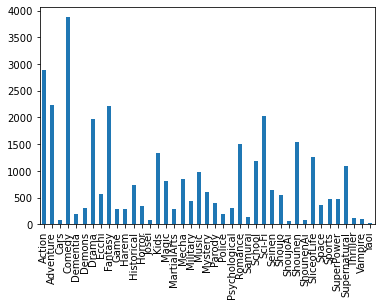

In [25]:
import numpy as np
import matplotlib.pyplot as plt
sums=dt.iloc[:, 1:].sum()
sums=sums.to_frame()
sums=sums.rename(columns = {0:'summ'})
number=sums['summ']
number.plot.bar()

Notiamo che il numero di elementi che appartengono ai vari generi (**etichette**) è molto vario; Ci sono generi meno presenti rispetto ad altri in maniera molto evidente.

Proviamo a bilanciare il dataset eliminando i generi meno rilevanti (molti di questi sono "sotto generi"); questo renderà i processi di apprendimento e predizione più semplici, migliorandone le prestazioni.

In [26]:
import warnings
import pandas as ps

sums=dt.iloc[:, 1:].sum()
sums=sums.to_frame()
sums=sums.rename(columns = {0:'summ'})
sums=sums[sums.summ <= 100]
sums=sums.index.tolist()
dt=dt = dt.drop(sums, axis=1)

warnings.filterwarnings('ignore')  #metodo deprecato
sums2=dt.sum(axis=1)
sums2=sums2.to_frame()
sums2=sums2.rename(columns = {0:'summ'})
dt = pd.concat([dt, sums2], axis=1)
dt=dt[dt.summ >=2]
dt.drop('summ', axis=1, inplace=True)
print('Record rimanenti:',dt.shape[0])

Record rimanenti: 8758


In [27]:

dt.to_csv('final_dataset.csv') 

In [28]:
import pandas as pd

dt = pd.read_csv ('final_dataset.csv')
dt.drop(columns=dt.columns[0], axis=1, inplace=True)
dt.head(3)

sypnopsis  Action  Adventure  \
0  year  humanity colonize planet moon solar syst...       1          1   
1  day bounty life unlucky crew bebop routine int...       1          0   
2  vash stampede man $ $ ,,, bounty head reason m...       1          1   

   Comedy  Dementia  Demons  Drama  Ecchi  Fantasy  Game  ...  Seinen  Shoujo  \
0       1         0       0      1      0        0     0  ...       0       0   
1       0         0       0      1      0        0     0  ...       0       0   
2       1         0       0      1      0        0     0  ...       0       0   

   Shounen  SliceofLife  Space  Sports  SuperPower  Supernatural  Thriller  \
0        0            0      1       0           0             0         0   
1        0            0      1       0           0             0         0   
2        1            0      0       0           0             0         0   

   Vampire  
0        0  
1        0  
2        0  

[3 rows x 37 columns]

<a id="5"></a>
<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:darkslategray; border:0; color:white' role="tab" aria-controls="home"><center>5. Implementazione e confronto  dei classificatori</center></h2>
    
![ia](https://en.agictech.com/media/1809/machine-learning.jpg)    
    
In primis, dividiamo il dataset in **train** e **test** set per verificare che i due insiemi abbiano le stesse caratteristiche.

Estrazione classi

In [29]:
from sklearn.model_selection import train_test_split

#Estraggo i generi
y= dt.iloc[: , 1:]
y.head(3)


Action  Adventure  Comedy  Dementia  Demons  Drama  Ecchi  Fantasy  Game  \
0       1          1       1         0       0      1      0        0     0   
1       1          0       0         0       0      1      0        0     0   
2       1          1       1         0       0      1      0        0     0   

   Harem  ...  Seinen  Shoujo  Shounen  SliceofLife  Space  Sports  \
0      0  ...       0       0        0            0      1       0   
1      0  ...       0       0        0            0      1       0   
2      0  ...       0       0        1            0      0       0   

   SuperPower  Supernatural  Thriller  Vampire  
0           0             0         0        0  
1           0             0         0        0  
2           0             0         0        0  

[3 rows x 36 columns]

Poichè i dati sono testuali, usiamo **TF-IDF** sui riassunti.

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dt['sypnopsis'])
X

<8758x32725 sparse matrix of type '<class 'numpy.float64'>'
	with 363268 stored elements in Compressed Sparse Row format>

In [31]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size =0.20)

#### 5.1 - Approcci diversi

Per effettuare una classificazione multi-label bisogna effettuare delle "trasformazioni" in modo da adattare i vari algoritmia problemi in cui gli item possono appartenere a più classi. In generale ci sono 3 approcci principali:
    
- **Binary relevance**: Questa tecnica tratta ogni etichetta in modo indipendente e quindi il problema viene trasformato in più problemi di classificazione singola.


- **Classifier chains**: In questa tecnica, abbiamo più classificatori collegati in una catena. Si tratta di un processo sequenziale in cui un output di un classificatore viene utilizzato come input del classificatore successivo nella catena.


- **Label powerset**: Trasforma il problema in un problema multi-classe. Ogni classificatore multiclasse viene quindi addestrato con combinazioni di etichette univoche presenti nei dati.L'obiettivo è trovare una combinazione di etichette univoche e assegnare loro valori diversi.


    


In [32]:
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

import time

#### 5.2 - Metriche

A causa della natura "sparsa" del dataset, è necessario scegliere delle metriche di valutazione adatte;Ad esempio,con i dati presi in considerazione potrebbe non essere conveniente usare l'accuratezza, proprio a causa dei dati estremamente sparpagliati.
Le metriche utilizzate, dunque, sono le seguenti:
    
- **Macro F1**: Il punteggio F1 macro viene calcolato utilizzando la media aritmetica (ovvero la media non ponderata) di tutti i punteggi F1 per classe.


- **Micro F1**: La micro media calcola un punteggio F1 medio globale contando le somme dei veri positivi (TP), dei falsi negativi (FN) e dei falsi positivi (FP).


- **Hamming**: La perdita di Hamming viene utilizzata per determinare la frazione di previsioni errate di un determinato modello. *Minore è la perdita di hamming, migliore è il nostro modello nel fare previsioni.*


In [33]:
from sklearn.metrics import f1_score
from sklearn.metrics import hamming_loss

#### 5.3 - Random Forest

Random Forest è un metodo di apprendimento "ensemble" che utilizza più alberi decisionali per ottenere risultati migliori. Il risultato finale sarà quello più frequente tra tutti gli esiti dei vari alberi.

![rf](https://miro.medium.com/max/1732/0*x5qFXPNNnbMqMO82)

In [34]:
from sklearn.ensemble import RandomForestClassifier

print("RandomForest - BinaryRelevance")
start=time.time()
classifier = BinaryRelevance(classifier=RandomForestClassifier(),require_dense = [False, True])
classifier.fit(Xtrain, ytrain)
predictions = classifier.predict(Xtest)
macro_f1 = f1_score(ytest, predictions, average='macro')
micro_f1 = f1_score(ytest, predictions, average='micro')
hamLoss = hamming_loss(ytest, predictions)
print('Macro F1 -> ',round((macro_f1)*100,2),"%")
print('Micro F1 -> ',round((micro_f1)*100,2),"%")
print('Hamming  -> ',round((hamLoss)*100,2),"%")
print('training time taken: ',round(time.time()-start,0),'seconds')
print('prediction time taken: ',round(time.time()-start,0),'seconds')

print("RandomForest - ClassifierChain")
start=time.time()
classifier = ClassifierChain(classifier=RandomForestClassifier(),require_dense = [False, True])
classifier.fit(Xtrain, ytrain)
predictions = classifier.predict(Xtest)
macro_f1 = f1_score(ytest, predictions, average='macro')
micro_f1 = f1_score(ytest, predictions, average='micro')
hamLoss = hamming_loss(ytest, predictions)
print('Macro F1 -> ',round((macro_f1)*100,2),"%")
print('Micro F1 -> ',round((micro_f1)*100,2),"%")
print('Hamming  -> ',round((hamLoss)*100,2),"%")
print('training time taken: ',round(time.time()-start,0),'seconds')
print('prediction time taken: ',round(time.time()-start,0),'seconds')

print("RandomForest - LabelPowerset")
start=time.time()
classifier = LabelPowerset(classifier=RandomForestClassifier(),require_dense = [False, True])
classifier.fit(Xtrain, ytrain)
predictions = classifier.predict(Xtest)
macro_f1 = f1_score(ytest, predictions, average='macro')
micro_f1 = f1_score(ytest, predictions, average='micro')
hamLoss = hamming_loss(ytest, predictions)
print('Macro F1 -> ',round((macro_f1)*100,2),"%")
print('Micro F1 -> ',round((micro_f1)*100,2),"%")
print('Hamming  -> ',round((hamLoss)*100,2),"%")
print('training time taken: ',round(time.time()-start,0),'seconds')
print('prediction time taken: ',round(time.time()-start,0),'seconds')




RandomForest - BinaryRelevance
Macro F1 ->  16.77 %
Micro F1 ->  28.21 %
Hamming  ->  8.98 %
training time taken:  495.0 seconds
prediction time taken:  495.0 seconds
RandomForest - ClassifierChain
Macro F1 ->  14.89 %
Micro F1 ->  26.42 %
Hamming  ->  9.1 %
training time taken:  434.0 seconds
prediction time taken:  434.0 seconds
RandomForest - LabelPowerset
Macro F1 ->  40.88 %
Micro F1 ->  47.76 %
Hamming  ->  9.99 %
training time taken:  506.0 seconds
prediction time taken:  506.0 seconds


#### 5.4 - MultinomialNB

L'algoritmo si basa sul teorema di Bayes e viene spesso utilizzato per la classificazione di un testo.
![rf](https://www.edureka.co/blog/content/ver.1554115042/uploads/2019/04/Naive-Bayes-Derivation-Equation-2-Naive-Bayes-In-R-Edureka.png)

In [35]:
from sklearn.naive_bayes import MultinomialNB

print("MultinomialNB - BinaryRelevance")
start=time.time()
classifier = BinaryRelevance(classifier=MultinomialNB(),require_dense = [False, True])
classifier.fit(Xtrain, ytrain)
predictions = classifier.predict(Xtest)
macro_f1 = f1_score(ytest, predictions, average='macro')
micro_f1 = f1_score(ytest, predictions, average='micro')
hamLoss = hamming_loss(ytest, predictions)
print('Macro F1 -> ',round((macro_f1)*100,2),"%")
print('Micro F1 -> ',round((micro_f1)*100,2),"%")
print('Hamming  -> ',round((hamLoss)*100,2),"%")
print('training time taken: ',round(time.time()-start,0),'seconds')
print('prediction time taken: ',round(time.time()-start,0),'seconds')

print("MultinomialNB - ClassifierChain")
start=time.time()
classifier = ClassifierChain(classifier=MultinomialNB(),require_dense = [False, True])
classifier.fit(Xtrain, ytrain)
predictions = classifier.predict(Xtest)
macro_f1 = f1_score(ytest, predictions, average='macro')
micro_f1 = f1_score(ytest, predictions, average='micro')
hamLoss = hamming_loss(ytest, predictions)
print('Macro F1 -> ',round((macro_f1)*100,2),"%")
print('Micro F1 -> ',round((micro_f1)*100,2),"%")
print('Hamming  -> ',round((hamLoss)*100,2),"%")
print('training time taken: ',round(time.time()-start,0),'seconds')
print('prediction time taken: ',round(time.time()-start,0),'seconds')

print("MultinomialNB - LabelPowerset")
start=time.time()
classifier = LabelPowerset(classifier=MultinomialNB(),require_dense = [False, True])
classifier.fit(Xtrain, ytrain)
predictions = classifier.predict(Xtest)
macro_f1 = f1_score(ytest, predictions, average='macro')
micro_f1 = f1_score(ytest, predictions, average='micro')
hamLoss = hamming_loss(ytest, predictions)
print('Macro F1 -> ',round((macro_f1)*100,2),"%")
print('Micro F1 -> ',round((micro_f1)*100,2),"%")
print('Hamming  -> ',round((hamLoss)*100,2),"%")
print('training time taken: ',round(time.time()-start,0),'seconds')
print('prediction time taken: ',round(time.time()-start,0),'seconds')

MultinomialNB - BinaryRelevance
Macro F1 ->  3.31 %
Micro F1 ->  9.26 %
Hamming  ->  9.94 %
training time taken:  1.0 seconds
prediction time taken:  1.0 seconds
MultinomialNB - ClassifierChain
Macro F1 ->  3.98 %
Micro F1 ->  11.43 %
Hamming  ->  9.83 %
training time taken:  0.0 seconds
prediction time taken:  0.0 seconds
MultinomialNB - LabelPowerset
Macro F1 ->  5.19 %
Micro F1 ->  21.23 %
Hamming  ->  12.57 %
training time taken:  5.0 seconds
prediction time taken:  5.0 seconds


#### 5.5 - LinearSVC
L'obiettivo di un LinearSVC (Support Vector Classifier) è quello di adattarsi ai dati forniti, restituendo un iperpiano "best fit" che divide o categorizza i dati. Da lì, dopo aver ottenuto l'iperpiano, puoi quindi fornire alcune funzionalità al tuo classificatore per vedere qual è la classe "prevista".
![rf](https://cmsc426spring2019.github.io/assets/math/ransac3.png)

In [36]:
from sklearn.svm import LinearSVC

print("LinearSVC - BinaryRelevance")
start=time.time()
classifier = BinaryRelevance(classifier=LinearSVC(),require_dense = [False, True])
classifier.fit(Xtrain, ytrain)
predictions = classifier.predict(Xtest)
macro_f1 = f1_score(ytest, predictions, average='macro')
micro_f1 = f1_score(ytest, predictions, average='micro')
hamLoss = hamming_loss(ytest, predictions)
print('Macro F1 -> ',round((macro_f1)*100,2),"%")
print('Micro F1 -> ',round((micro_f1)*100,2),"%")
print('Hamming  -> ',round((hamLoss)*100,2),"%")
print('training time taken: ',round(time.time()-start,0),'seconds')
print('prediction time taken: ',round(time.time()-start,0),'seconds')

print("LinearSVC - ClassifierChain")
start=time.time()
classifier = ClassifierChain(classifier=LinearSVC(),require_dense = [False, True])
classifier.fit(Xtrain, ytrain)
predictions = classifier.predict(Xtest)
macro_f1 = f1_score(ytest, predictions, average='macro')
micro_f1 = f1_score(ytest, predictions, average='micro')
hamLoss = hamming_loss(ytest, predictions)
print('Macro F1 -> ',round((macro_f1)*100,2),"%")
print('Micro F1 -> ',round((micro_f1)*100,2),"%")
print('Hamming  -> ',round((hamLoss)*100,2),"%")
print('training time taken: ',round(time.time()-start,0),'seconds')
print('prediction time taken: ',round(time.time()-start,0),'seconds')

print("LinearSVC - LabelPowerset")
start=time.time()
classifier = LabelPowerset(classifier=LinearSVC(),require_dense = [False, True])
classifier.fit(Xtrain, ytrain)
predictions = classifier.predict(Xtest)
macro_f1 = f1_score(ytest, predictions, average='macro')
micro_f1 = f1_score(ytest, predictions, average='micro')
hamLoss = hamming_loss(ytest, predictions)
print('Macro F1 -> ',round((macro_f1)*100,2),"%")
print('Micro F1 -> ',round((micro_f1)*100,2),"%")
print('Hamming  -> ',round((hamLoss)*100,2),"%")
print('training time taken: ',round(time.time()-start,0),'seconds')
print('prediction time taken: ',round(time.time()-start,0),'seconds')

LinearSVC - BinaryRelevance
Macro F1 ->  40.62 %
Micro F1 ->  52.58 %
Hamming  ->  7.55 %
training time taken:  1.0 seconds
prediction time taken:  1.0 seconds
LinearSVC - ClassifierChain
Macro F1 ->  42.83 %
Micro F1 ->  53.76 %
Hamming  ->  7.67 %
training time taken:  2.0 seconds
prediction time taken:  2.0 seconds
LinearSVC - LabelPowerset
Macro F1 ->  48.57 %
Micro F1 ->  55.09 %
Hamming  ->  9.07 %
training time taken:  20.0 seconds
prediction time taken:  20.0 seconds


#### 5.6 - KNeighborsClassifier
L'algoritmo Knn,scelto a priori un numero di fisso di punti, classifica gli items in base ai dati, rappresentati dai punti, che "circondano" il dato da classificare.


![rf](https://th.bing.com/th/id/R.47219d9efb93c94f9a7777d5abdc90a7?rik=%2fwhHOh2968gKQw&pid=ImgRaw&r=0&sres=1&sresct=1)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
print("KNeighborsClassifier - BinaryRelevance")
start=time.time()
classifier = BinaryRelevance(classifier=KNeighborsClassifier(),require_dense = [False, True])
classifier.fit(Xtrain, ytrain)
predictions = classifier.predict(Xtest)
macro_f1 = f1_score(ytest, predictions, average='macro')
micro_f1 = f1_score(ytest, predictions, average='micro')
hamLoss = hamming_loss(ytest, predictions)
print('Macro F1 -> ',round((macro_f1)*100,2),"%")
print('Micro F1 -> ',round((micro_f1)*100,2),"%")
print('Hamming  -> ',round((hamLoss)*100,2),"%")
print('training time taken: ',round(time.time()-start,0),'seconds')
print('prediction time taken: ',round(time.time()-start,0),'seconds')

print("KNeighborsClassifier - ClassifierChain")
start=time.time()
classifier = ClassifierChain(classifier=KNeighborsClassifier(),require_dense = [False, True])
classifier.fit(Xtrain, ytrain)
predictions = classifier.predict(Xtest)
macro_f1 = f1_score(ytest, predictions, average='macro')
micro_f1 = f1_score(ytest, predictions, average='micro')
hamLoss = hamming_loss(ytest, predictions)
print('Macro F1 -> ',round((macro_f1)*100,2),"%")
print('Micro F1 -> ',round((micro_f1)*100,2),"%")
print('Hamming  -> ',round((hamLoss)*100,2),"%")
print('training time taken: ',round(time.time()-start,0),'seconds')
print('prediction time taken: ',round(time.time()-start,0),'seconds')

print("KNeighborsClassifier - LabelPowerset")
start=time.time()
classifier = LabelPowerset(classifier=KNeighborsClassifier(),require_dense = [False, True])
classifier.fit(Xtrain, ytrain)
predictions = classifier.predict(Xtest)
macro_f1 = f1_score(ytest, predictions, average='macro')
micro_f1 = f1_score(ytest, predictions, average='micro')
hamLoss = hamming_loss(ytest, predictions)
print('Macro F1 -> ',round((macro_f1)*100,2),"%")
print('Micro F1 -> ',round((micro_f1)*100,2),"%")
print('Hamming  -> ',round((hamLoss)*100,2),"%")
print('training time taken: ',round(time.time()-start,0),'seconds')
print('prediction time taken: ',round(time.time()-start,0),'seconds')


KNeighborsClassifier - BinaryRelevance
Macro F1 ->  41.26 %
Micro F1 ->  47.92 %
Hamming  ->  8.49 %
training time taken:  15.0 seconds
prediction time taken:  15.0 seconds
KNeighborsClassifier - ClassifierChain
Macro F1 ->  36.24 %
Micro F1 ->  45.39 %
Hamming  ->  10.09 %
training time taken:  17.0 seconds
prediction time taken:  17.0 seconds
KNeighborsClassifier - LabelPowerset
Macro F1 ->  37.02 %
Micro F1 ->  44.52 %
Hamming  ->  10.75 %
training time taken:  1.0 seconds
prediction time taken:  1.0 seconds


#### 5.7 - Rete Neurale - MLP

Il Percettrone multistrato (in acronimo MLP dall'inglese Multilayer perceptron) è un modello di rete neurale artificiale che mappa insiemi di dati in ingresso in un insieme di dati in uscita appropriati.

È fatta di strati multipli di nodi in un grafo diretto, con ogni strato completamente connesso al successivo. Eccetto che per i nodi in ingresso, ogni nodo è un neurone (elemento elaborante) a cui è associata una funzione di attivazione lineare. Il Percettrone multistrato usa una tecnica di apprendimento supervisionato chiamata backpropagation per l'allenamento della rete.

La MLP è una modifica del Percettrone lineare standard e può distinguere i dati che non sono separabili linearmente.

*fonte:* Wikipedia
![rf](https://www.researchgate.net/profile/Ahmed-Thabit-2/publication/315561192/figure/download/fig4/AS:475189663277059@1490305452719/Figure-4-MLP-neural-network-structure-The-weights-of-the-neural-network-are-updated-in.png)

A causa dei tempi di addestramento e predizione estremamente lunghi, in particolare con gli adattamenti **LabelPowerset e ClassifierChain**, verrà utilizzato solo la BinaryRelevance.
Dopo una serie di prove,i parametri per l'addestramento della rete che hanno dato i risultati migliori in termini di tempo e validazione sono i seguenti:
- **hidden_layer_sizes** = 150 -> rappresenta il numero di neuroni nell'i-esimo strato nascosto.

- **max_iter** = 250 -> Numero massimo di iterazioni. Il risolutore itera fino alla convergenza (determinata da 'tol') o questo numero di iterazioni.

- **activation** = "relu" -> Funzione di attivazione 

- **early_stopping** = True -> Blocca l'addestramento se il risultato non migliora

- **learning_rate** = 'adaptive' -> 'adattivo' mantiene il tasso di apprendimento costante a 'learning_rate_init' finché la perdita di allenamento continua a diminuire. 
- **solver** = 'lbfgs' -> algoritmo di ottimizzazione

- **hidden_layer_sizes**: 150 -> il numero di neuroni nell'i-esimo strato nascosto.

*fonte*: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [49]:
from sklearn.neural_network import MLPClassifier
print("MLPClassifier - BinaryRelevance")
start=time.time()
classifier = BinaryRelevance(classifier=MLPClassifier(hidden_layer_sizes=150,random_state=100,solver='lbfgs', max_iter=250,activation="relu",early_stopping=True),require_dense = [False, True])
classifier.fit(Xtrain, ytrain)
predictions = classifier.predict(Xtest)
macro_f1 = f1_score(ytest, predictions, average='macro')
micro_f1 = f1_score(ytest, predictions, average='micro')
hamLoss = hamming_loss(ytest, predictions)
print('Macro F1 -> ',round((macro_f1)*100,2),"%")
print('Micro F1 -> ',round((micro_f1)*100,2),"%")
print('Hamming  -> ',round((hamLoss)*100,2),"%")
print('training time taken: ',round(time.time()-start,0),'seconds')
print('prediction time taken: ',round(time.time()-start,0),'seconds')

MLPClassifier - BinaryRelevance
Macro F1 ->  47.65 %
Micro F1 ->  55.24 %
Hamming  ->  7.81 %
training time taken:  1545.0 seconds
prediction time taken:  1545.0 seconds


<a id="6"></a>
<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:light-blue; border:0; color:white' role="tab" aria-controls="home"><center>Conclusione e considerazioni finali</center></h2>
    

Tra tutti gli algoritmi testati, nonostante i tempi di addestramento e predizione molto lunghi e risultati non ottimali, il classificatore MLP risulta essere il migliore, nonostante la differenza con LinearSVC in Labelpowerset sia davvero minima. Il peggiore, invece, è il Multinomial Naive Bayes.

Da notare come i risultati, in termini di tempo e metrcihe di validazione, cambi radicalmente modificando il tipo di adattamento utilizzato: considerando il Random Forest si nota una grossa differenza di risultati tra LabelPowerset e gli altri metodi.

Inoltre, è possibile notare che generalmente, il metodo di adattamento migliore è LabelPowerset.

In conclusione si può affermare che, a causa della scarsa qualità dei dati che risultano essere sparsi e con sinossi non adatte, non è possibile ottenere un classificatore ideale per il dataset in esame.